## Loading data and viewing some basic descriptives

In [ ]:
#Aparna
#Set up and file reading
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

url_to_data = "https://raw.githubusercontent.com/AparnaNagarajan/data-science/master/train.csv"
house_pricing_data = pd.read_csv(url_to_data)
house_pricing_data.info()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

### Missing Value - Determining rate of missing values across all attributes

In [ ]:
#Sean

#Check if any null value
display(house_pricing_data.isnull().values.any())

#Calculate the missing value rate
missing_value = house_pricing_data.isnull().sum()
missing_value_rate = (missing_value[missing_value > 0] / len(house_pricing_data)).sort_values(ascending = False)
missing_value_rate

True

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

### Missing Value - Dropping a few attributes
Dropping columns with missing values > 30%

In [ ]:
#Sean

#Find the columns with missing value rate more than 30%, which columns might need to be dropped
#Drop columns found above

col_to_drop = missing_value_rate[missing_value_rate > 0.3].index
display(col_to_drop)
house_pricing_data = house_pricing_data.drop(col_to_drop, axis = 1)
house_pricing_data.info()

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Missing Value - Filling in missing values

In [ ]:
#Sean

#Columns with missing values that have not been dropped 

col_not_drop = missing_value_rate[missing_value_rate <= 0.3].index
col_not_drop

Index(['LotFrontage', 'GarageYrBlt', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType',
       'Electrical'],
      dtype='object')

In [ ]:
#Sean 

#Since the data type in some of the columns above is string, now to find the columns with numeric data

numeric_col = house_pricing_data[col_not_drop]._get_numeric_data().columns
numeric_col


Index(['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], dtype='object')

#### Filling missing values for non numeric attributes



*   **Electrical** : This attribute is being filled with the most common type (mode).

*   **Basement Attributes**: It is important to note that NA in bsmtQual, bsmtCond, bsmtExposure, bsmtFinType1, and bsmtFinType2, actually means there is no basement, which can be proved by an indicator TotalBsmtSF. If TotalBsmtSF displays 0, it means no basement. To handle NAs in the Basement Attributes, NAs will be replaced by 'No Basement' if TotalBsmtSF is 0. For the rest missing values, mode is used to replace the missing data. 

* **Garage attributes**: 
It is important to note that NA in GarageYrBlt, GarageFinish, GarageQual, & GarageCond actually means there is no garage, which can be proved by an indicator GarageArea. If GarageArea displays 0, it means no garafe. To handle NAs in the Garage Attributes, NAs will be replaced by 'No Garage' if GarageArea is 0. For the rest missing values, mode is used to replace the missing data.

Also searching the web says that at best only 78% of US homes have garages/carports. In our case, just under 6% of homes do not have garages. If anything, it appears only 5.5% of homes in Ames, Iowa do not have garages.

https://www.energy.gov/eere/vehicles/fact-958-january-2-2017-sixty-three-percent-all-housing-units-have-garage-or-carport


In [ ]:
#Aparna

#Filling in some na values for Electrical with mode
electrical_mode = house_pricing_data['Electrical'].mode()[0]
display(electrical_mode)
house_pricing_data['Electrical'].fillna(electrical_mode, inplace=True)   

#Filling in basement related attributes
def bsmtNAfunction(x, col) :
  if pd.isna(x[col]):
    if(x['TotalBsmtSF']==0):
      return 'No Basement'
    else:
      return x[col]
  else:
    return x[col]

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    house_pricing_data[col] = house_pricing_data.apply(lambda x : bsmtNAfunction(x, col), axis = 1)

bsmt_exposure_mode = house_pricing_data['BsmtExposure'].mode()[0]
bsmt_finType2_mode = house_pricing_data['BsmtFinType2'].mode()[0]
display(bsmt_exposure_mode)
display(bsmt_finType2_mode)
house_pricing_data['BsmtExposure'].fillna(bsmt_exposure_mode, inplace=True)
house_pricing_data['BsmtFinType2'].fillna(bsmt_finType2_mode, inplace=True)
#house_pricing_data.dropna(subset=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], inplace=True)

'SBrkr'

'No'

'Unf'

In [ ]:
# Steve
# Replace NaN with "Missing"
# Pivoting is more informative when we don't have NaN. For now, using "Missing"
#Filling in basement related attributes
def garageNAfunction(x, col) :
  if pd.isna(x[col]):
    if(x['GarageArea']==0):
      return 'No Garage'
    else:
      return x[col]
  else:
    return x[col]

for col in ('GarageType',	'GarageYrBlt', 'GarageFinish',	'GarageQual',	'GarageCond'):
    house_pricing_data[col] = house_pricing_data.apply(lambda x : garageNAfunction(x, col), axis = 1)

In [ ]:
mas_vnr_mode = house_pricing_data['MasVnrType'].mode()[0]
display(mas_vnr_mode)
house_pricing_data['MasVnrType'].fillna(mas_vnr_mode, inplace = True)

'None'

#### Filling missing values for numeric attributes



*   LotFrontage : LotFrontage attribute is related to the Neighborhood and GarageCar. The box plots below indicate the same. The more cars the garage can fit the more LotFrontage it has. Also every neighborhood that have a fairly distinct spread of LotFrontage values. Hence grouping the data by Neighborhood and GarageCar should form distinct groups whose median can be used as a value to fill in NaNs.
*   GarageYrBlt: Based on the observation of the raw data, it can be noticed that the missing value in this column is shown as NA. And it is also worth noting that all NAs are associated with 0 value in the GarageArea, which means there is no garage. So NAs here are being replaced by 'No Garage'.

*   MasVnrArea: MasVnrArea attribute is not related to any other attributes so just simply fill NaNs with its median, but except for those MasVnrType is None.






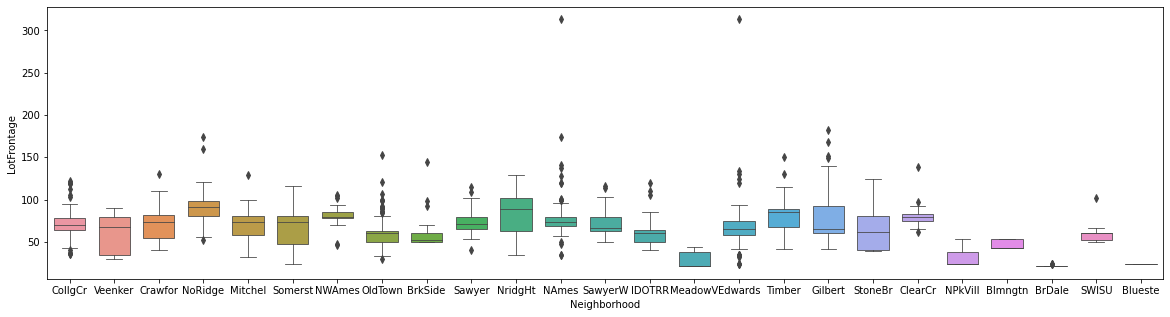

In [ ]:
#Aparna 
# Neighborhood vs. LotFrontage
plt.figure(figsize=(20,5))
sns.boxplot(x=house_pricing_data['Neighborhood'], y=house_pricing_data['LotFrontage'], width=0.7, linewidth=0.8)

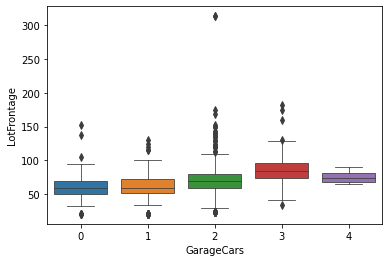

In [ ]:
#Aparna 
# Neighborhood vs. LotFrontage
sns.boxplot(x=house_pricing_data['GarageCars'], y=house_pricing_data['LotFrontage'], linewidth=0.8)

#Sean
def FillNullValue(x, col_name, df_group):
  global_median = house_pricing_data['LotFrontage'].median(skipna=True)
  if not pd.isna(x[col_name]):
    return x[col_name]
  else:
    group_median = df_group.get_group((x['Neighborhood'], x['GarageCars']))['LotFrontage'].median()
    if pd.isnull(group_median) :
      return global_median
    return group_median

lot_frontage_group = house_pricing_data.groupby(['Neighborhood', 'GarageCars'])
house_pricing_data['LotFrontage'] = house_pricing_data.apply(lambda x : FillNullValue(x, 'LotFrontage', lot_frontage_group), axis = 1)

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

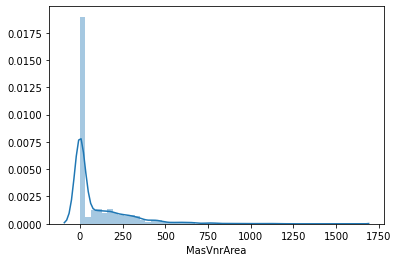

In [ ]:
sns.distplot(house_pricing_data['MasVnrArea']);
display(house_pricing_data['MasVnrArea'].describe())

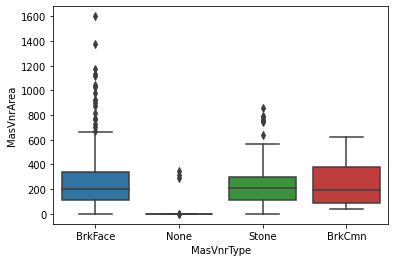

In [ ]:
#Sean
#Boxplot: MasVnrArea vs. MasVnrType
#To find if there is any relationship between MasVnrArea and MasVnrType in order to fill the null values in MasVnrArea
sns.boxplot(house_pricing_data['MasVnrType'], house_pricing_data['MasVnrArea'])

In [ ]:
#Sean

#From the plot above, the MasVnrArea for different type of Masonry Veneer is pretty
#much the same so there should not be any relationship between MasVnrType and MasVnrArea

#Check if any null value in MasVnrArea
display(house_pricing_data['MasVnrArea'].isnull().values.any())
#If we look into the data in MasVnrArea, we can find out the value 0 means there is
#no Masonry Venner since MasVnrType value is None. For the rest of null value
#in MasVnrArea, just simply fill them out using the median

def masVnrNAfunction(x, col) :
  if pd.isna(x[col]):
    if(x['MasVnrType'] == 'None'):
      return 0
    else:
      return x[col]
  else:
    return x[col]


house_pricing_data['MasVnrArea'] = house_pricing_data.apply(lambda x : masVnrNAfunction(x, 'MasVnrArea'), axis = 1)

#Get the mode
masVnrAreaMode = house_pricing_data['MasVnrArea'].mode()
display(masVnrAreaMode)

#Fill the null value using median found above

house_pricing_data['MasVnrArea'].fillna(masVnrAreaMode, inplace = True)

#Check null value again
house_pricing_data['MasVnrArea'].isnull().value_counts()


True

0    0.0
dtype: float64

False    1460
Name: MasVnrArea, dtype: int64

In [ ]:
house_pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Feature Engineering

In [ ]:
#Aparna
#Based on the observation from the raw dataset and real life house purchasing experience, it is assumed that the total square feet of the property, total bathrooms, swimming pool, and fire place also have impact
#on the house price. Hence, these attributes are generated for further analysis.

#Adding secondary attributes
house_pricing_data['TotalSF']=house_pricing_data['TotalBsmtSF'] + house_pricing_data['1stFlrSF'] + house_pricing_data['2ndFlrSF']
house_pricing_data['Total_sqr_footage'] = (house_pricing_data['BsmtFinSF1'] + house_pricing_data['BsmtFinSF2'] +
                                 house_pricing_data['1stFlrSF'] + house_pricing_data['2ndFlrSF'])
house_pricing_data['Total_Bathrooms'] = (house_pricing_data['FullBath'] + (0.5 * house_pricing_data['HalfBath']) +
                               house_pricing_data['BsmtFullBath'] + (0.5 * house_pricing_data['BsmtHalfBath']))
house_pricing_data['Total_porch_sf'] = (house_pricing_data['OpenPorchSF'] + house_pricing_data['3SsnPorch'] +
                              house_pricing_data['EnclosedPorch'] + house_pricing_data['ScreenPorch'] +
                              house_pricing_data['WoodDeckSF'])
house_pricing_data['haspool'] = house_pricing_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
house_pricing_data['has2ndfloor'] = house_pricing_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
house_pricing_data['hasgarage'] = house_pricing_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
house_pricing_data['hasbsmt'] = house_pricing_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
house_pricing_data['hasfireplace'] = house_pricing_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
house_pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1460 non-null   int64  
 1   MSSubClass         1460 non-null   int64  
 2   MSZoning           1460 non-null   object 
 3   LotFrontage        1460 non-null   float64
 4   LotArea            1460 non-null   int64  
 5   Street             1460 non-null   object 
 6   LotShape           1460 non-null   object 
 7   LandContour        1460 non-null   object 
 8   Utilities          1460 non-null   object 
 9   LotConfig          1460 non-null   object 
 10  LandSlope          1460 non-null   object 
 11  Neighborhood       1460 non-null   object 
 12  Condition1         1460 non-null   object 
 13  Condition2         1460 non-null   object 
 14  BldgType           1460 non-null   object 
 15  HouseStyle         1460 non-null   object 
 16  OverallQual        1460 

## Data Exploration - Univariate & Bivariate Analysis


#### Which variables do we really need?

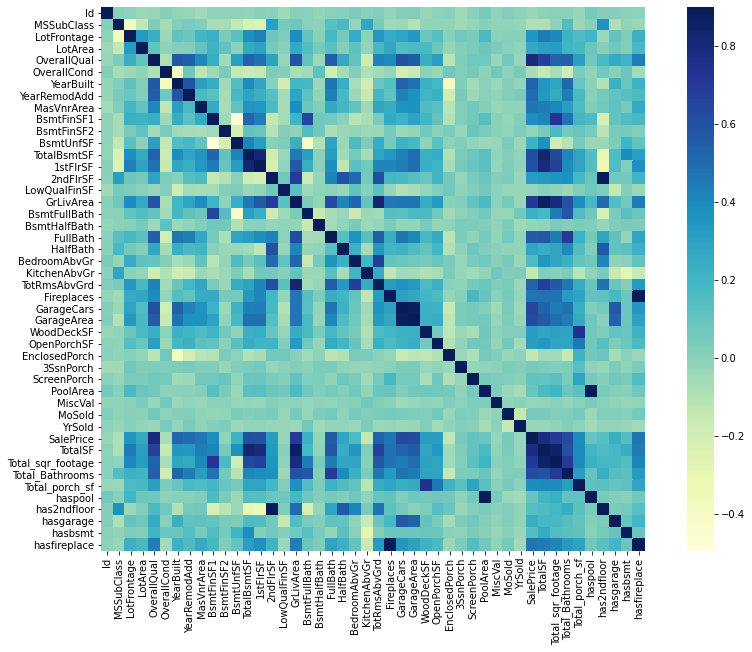

In [ ]:
# Sirisha
# Tl;dr Summary
# Drop variables: 'GarageArea', 'GarageYrBuilt', 'GrLivArea', 'Street', 'Utilities'
# Transform to Binary/Nominal variables: 'MSZoning','YearRemodelAdd', 'LotShape', 'LandContour',
corrmat = house_pricing_data.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=0.90, square=True, cmap="YlGnBu");

#Sirisha
# Observations
# Saleprice is strongly correlated to 'OverallQual', 'GrLivArea' and 'TotalBsmtSF'
# '1stFlrSF' and 'TotalBsmtSF' have high degree of correlation. Similarly, 'GarageCars' and 'GarageArea'. There are good candidates to introduce 
# multicollinearity for the model. Suggestions indicated below. Please advise if you have other ideas
# Drop 'TotalBsmtSF', since that is not the primary parameter of a house compared to '1stFlrSF'. Alternative is to enginneer a new attribute which is the sum of both the areas
# Drop 'GarageArea', since the area of the Garage itself is a proxy to the numbers of the cars ('GarageCars') a garage can fit.
# Drop 'GarageYrBlt' from our analysis, since we already have 'Yearbuilt'
# 'TotRmsAbvGrd' and 'GrLivArea' are both talking about the same parameter and are directly proportionate. Would suggest using 'TotRmsAbvGrd' to avoid additional binning of Areas
# 'YearRemodelAdd' is the same as 'YearBuilt' for non-remodeled homes. Suggest to convert this to a binary variable to identify effect of remodeling and to avoid multicollinearity

# This graph is also going to help us fill missing varilables for predictor variables (Re: 'LotFrontage') 

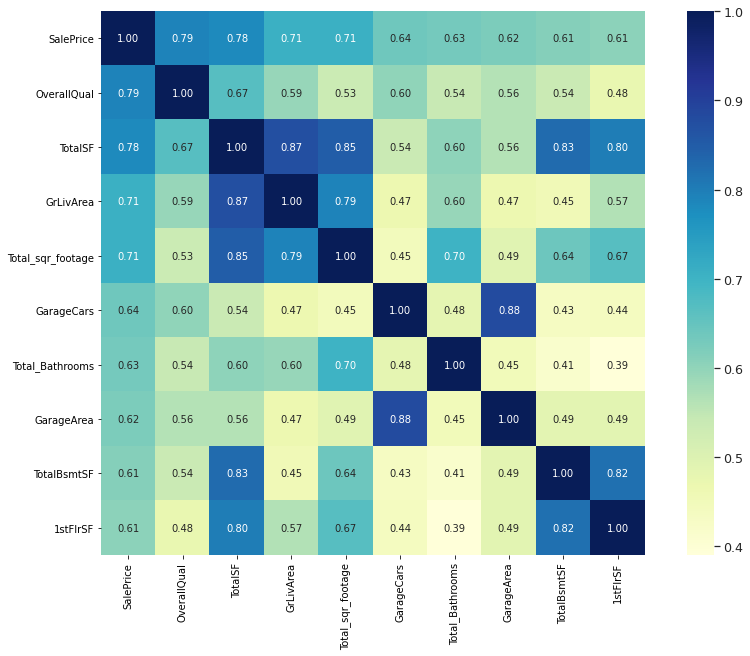

In [ ]:
# Sirisha
#Deep dive on highly correlated quantitative variables. Using threshold as Top 10 highest correlated variables
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_pricing_data[cols].values.T)
f, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=1.15)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap="YlGnBu")
plt.show()

# Observations: This graph is also going to help us fill missing varilables for predictor variables (Re: 'LotFrontage')

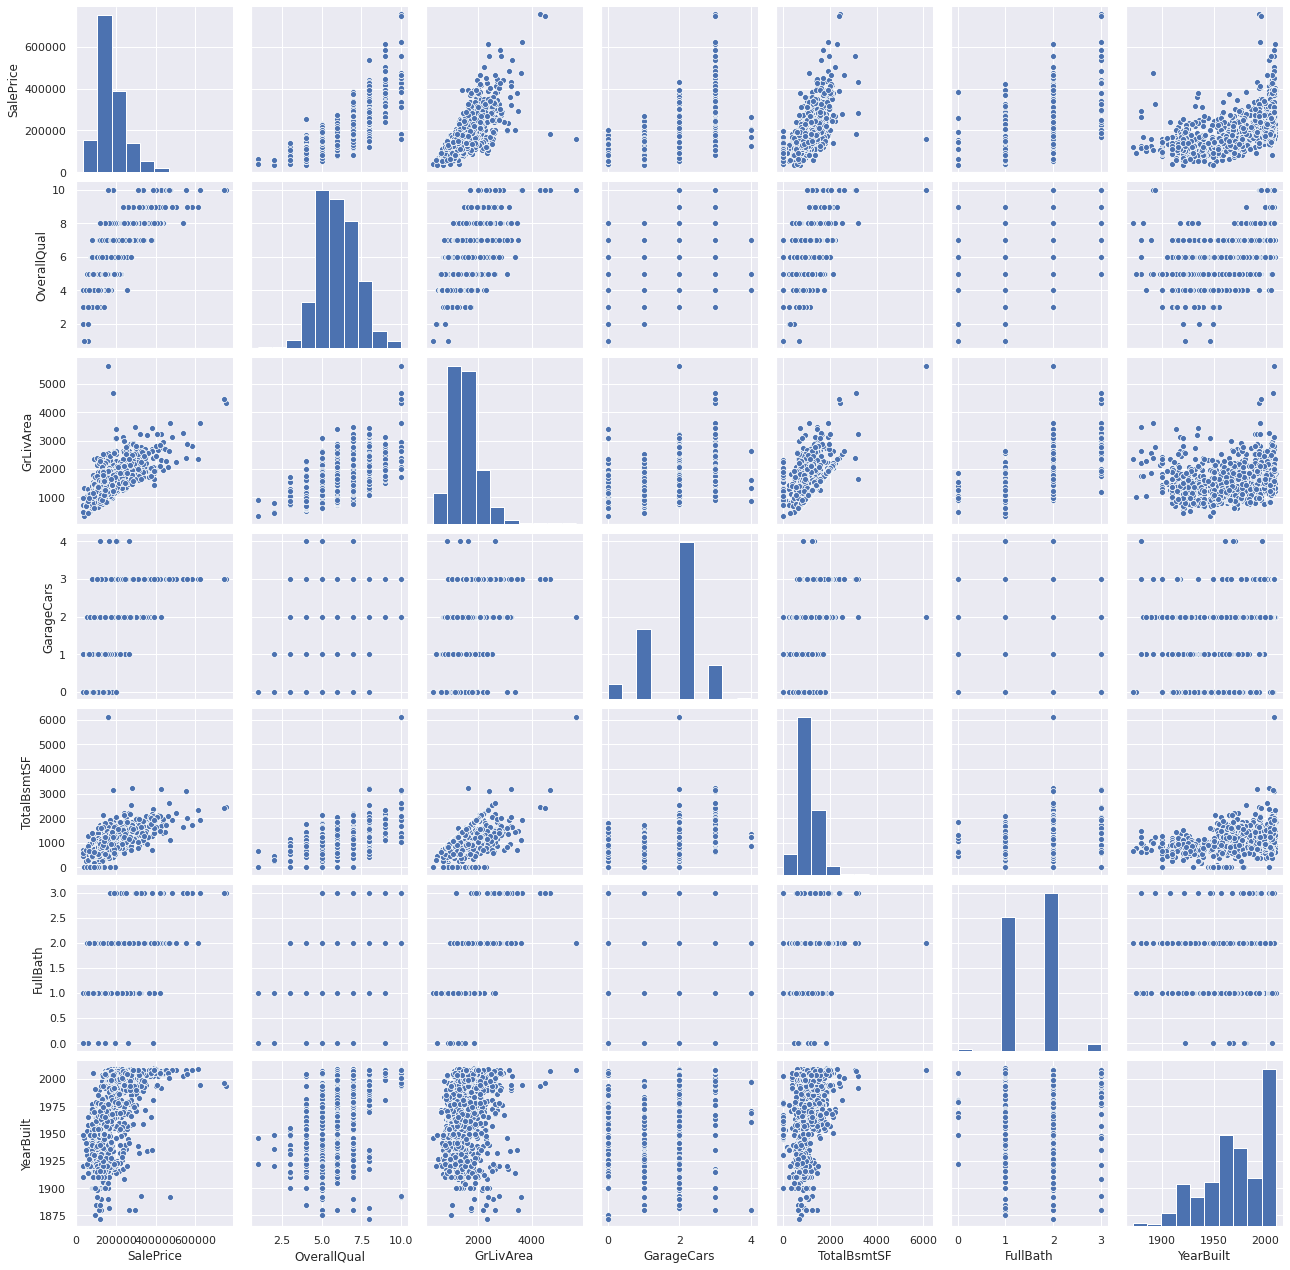

In [ ]:
#Scatterplot to understand how variables are associated 
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_pricing_data[cols], height = 2.5)
plt.show();
# Observations: Validates common understanding that 'Saleprice' is strongly correlated with GrLivArea. Similar pattern is with 'TotalBsmtSF'. Also important to see that house prices of recent years' constructions are significantly higher
# Middle Quartiles in 'OverallQual' doesn't seem to impact the 'SalePrice' as one would expect
# 'GrLivArea' and 'TotalBsmtSF'create a V in the scatter plot which indicate that in most cases the basement area is constarained by the Above ground living area. There are 2 outliers though.
# The general trend is newer homes seem to have comparitively higher Basement Square footage 


In [ ]:
#Yezhou Jiang
#house_pricing_data['Bedroom'].head(5)
house_pricing_data.head(5)

Id  MSSubClass MSZoning  ...  hasgarage  hasbsmt hasfireplace
0   1          60       RL  ...          1        1            0
1   2          20       RL  ...          1        1            1
2   3          60       RL  ...          1        1            1
3   4          70       RL  ...          1        1            1
4   5          60       RL  ...          1        1            1

[5 rows x 85 columns]

#### Step 1 Understand the target Variable - SalePrice

  * All prices are fall in range [34900,755000] and no negative values, so no noise data is detected.

  * Based on the histogram showing below, it can be noticed that the target variable has a right tail distribution, we need to consider whether need to convert right tail distribution to normal distribution for modeling benefits

  * Based on the boxplot showing below, it can be noticed that values more than approximately 340000 are outliers

In [ ]:
  #Obeservation 1: Quartile check and basic noise data check
house_pricing_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


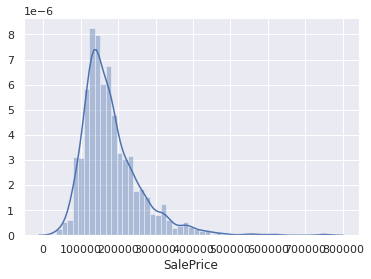

In [ ]:
  #Obeservation 2: Skewness and Kurtosis check
sns.distplot(house_pricing_data['SalePrice'])
print('Skewness: %f'%house_pricing_data['SalePrice'].skew())
print('Kurtosis: %f'%house_pricing_data['SalePrice'].kurt())

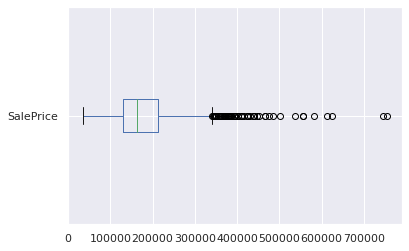

In [ ]:
  #Obeservation 3: Outliers check
house_pricing_data.SalePrice.plot(kind="box", vert=False)

####Step 2 Understand explanatory variables (predictor variables) - Numerical Variables or Categorical Variables
  * **Numerical Variables**: LotFrontage, LotArea, YearBuilt, YearRemodAdd,MasVnrArea, BsmtFinSF1, BsmtFinSF2,BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageYrBlt, GarageArea, WoodDeckSF,
OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold
  
  * **Categorical Variables**: MSSubClass, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageFinish, GarageCars, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition

  * In total, there are 79 explanatory variables (excluding ID, and SalePrice). But it is too much work to understand each of them, and also not all of these variables will be selected as model inputs. Hence, based on the correlation level between target variables and explanatory variables, we only need to understand a few of explanatory variables

 * Based on the correlation heat map showing below, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea, have a strong correlation with a target variable - SalePrice. These variables worth further understanding as they have strong positive relationship with the target variable.

* Correlation coefficient(R) interpretation: 
R in range [-1,1], 
    when R < 0, then negative correlation,

    when R > 0, then positive correlation. 

    when R = 0, then no correlation

* Here we are looking for positive correlation 

    0.00 < R < 0.199 Very Low Positive Correlation

    0.20 < R < 0.399 Low Positive Correlation

    0.40 < R < 0.599 Morderate Positive Correlation

    0.60 < R < 0.799 Storng Positive Correlation

    0.80 < R < 1 Very Strong Positive Correlation


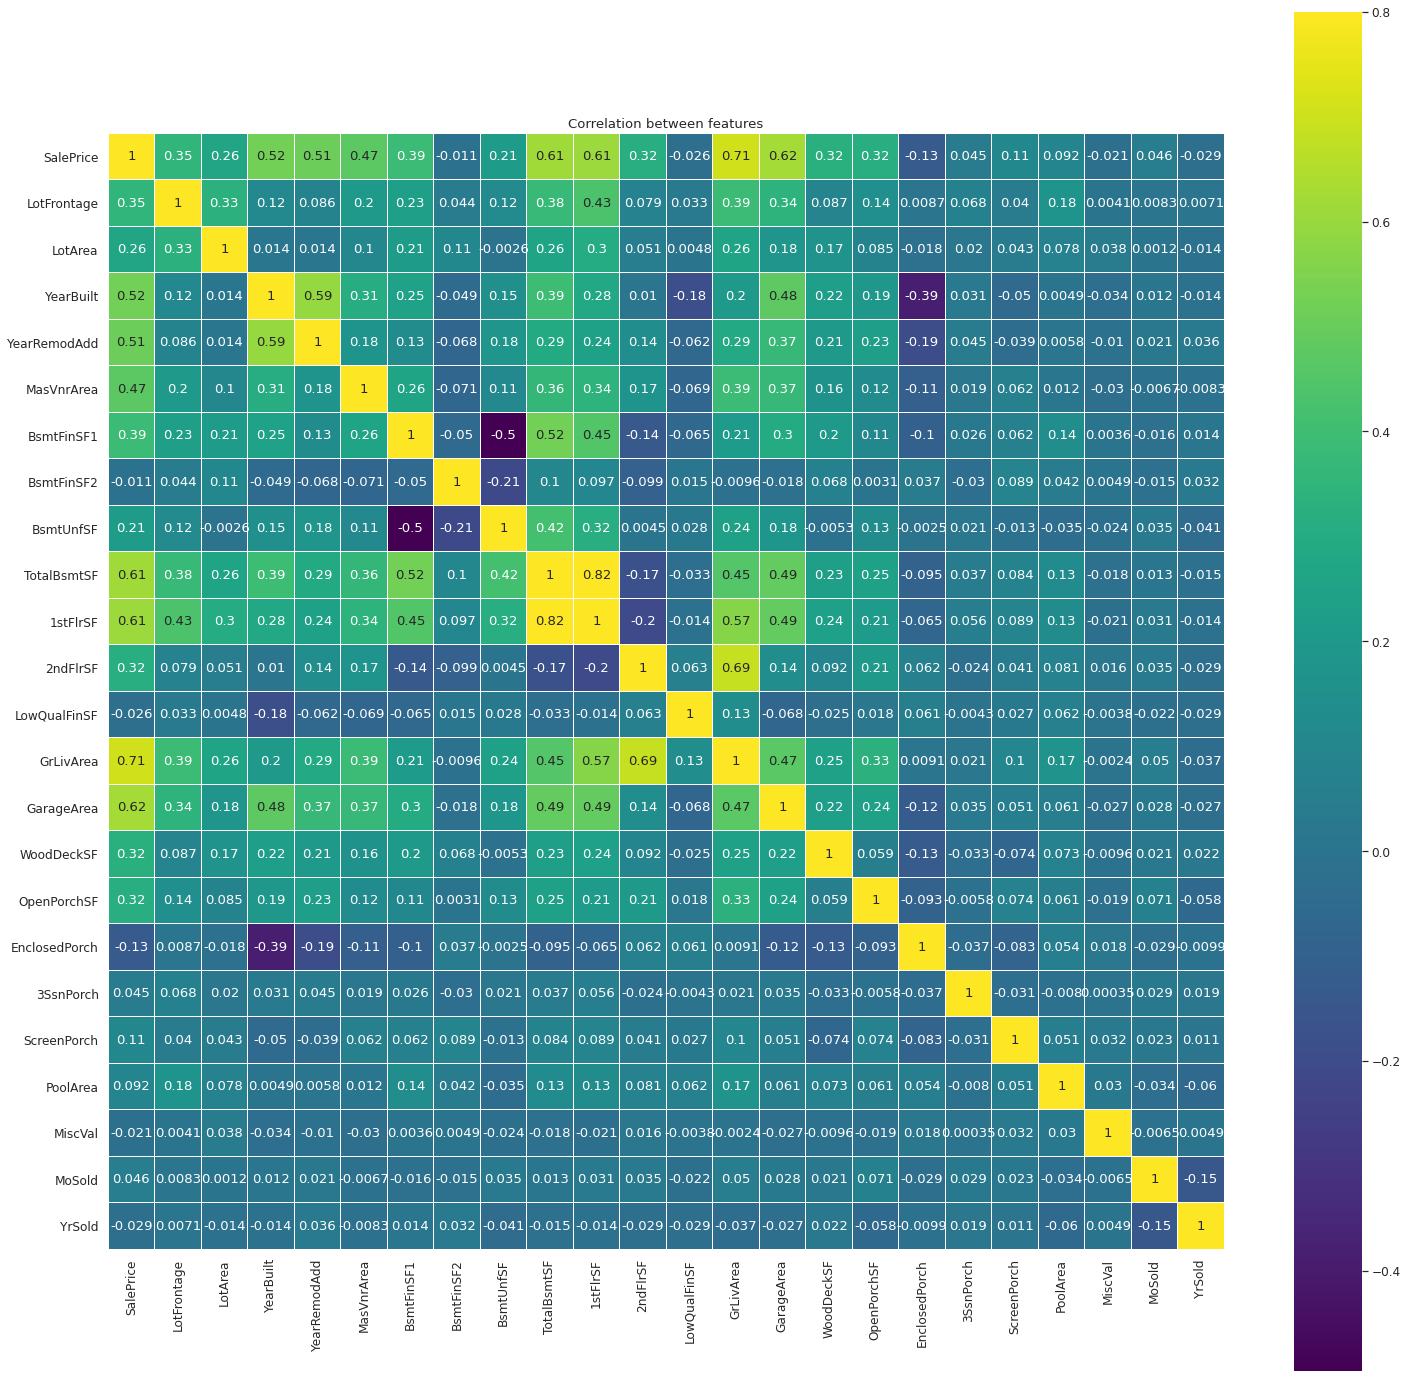

In [ ]:
corrMatrix = house_pricing_data[["SalePrice","LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd","MasVnrArea", "BsmtFinSF1"
                                , "BsmtFinSF2","BsmtUnfSF","TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea",
                                 "GarageYrBlt", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                                 "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(25, 25))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');


##### **Correlation between numerical variables and target variable**

* YearBuilt & SalePrice - The newer the house, the higher price the house

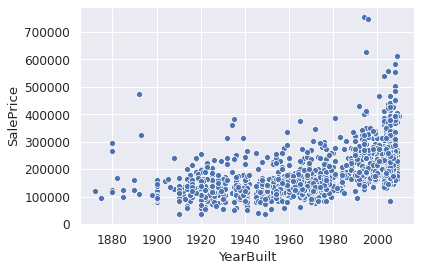

In [ ]:
  sns.scatterplot(house_pricing_data.YearBuilt, house_pricing_data.SalePrice)

* YearRemodAdd & SalePrice - Newly renovated homes seem to have higher prices.

In [ ]:
pd.set_option('display.max_rows', None)

house_pricing_data.groupby('YearBuilt').agg({'Id':'size', 'SalePrice':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'})\
                  .round(0).sort_values(by='YearBuilt', ascending=False)

count  mean_price
YearBuilt                   
2010           1    394432.0
2009          18    269220.0
2008          23    348849.0
2007          49    255363.0
2006          67    251775.0
2005          64    229681.0
2004          54    210348.0
2003          45    227409.0
2002          23    226870.0
2001          20    242630.0
2000          24    210767.0
1999          25    210615.0
1998          25    220450.0
1997          14    214925.0
1996          15    259163.0
1995          18    262194.0
1994          19    247900.0
1993          17    218059.0
1992          13    218385.0
1991           5    186140.0
1990          12    220882.0
1989           3    279500.0
1988          11    204636.0
1987           3    198000.0
1986           5    212000.0
1985           5    191400.0
1984           9    164111.0
1983           4    181400.0
1982           6    132400.0
1981           5    249880.0
1980          10    164800.0
1979           9    156397.0
1978          16    160962.0
1977          32    166861.0
1976          33    163832.0
1975           8    159269.0
1974          10    183050.0
1973          11    139400.0
1972          23    140570.0
1971          22    131820.0
1970          24    134648.0
1969          14    160726.0
1968          22    166075.0
1967          16    142338.0
1966          18    159559.0
1965          24    153116.0
1964          15    161893.0
1963          16    143403.0
1962          19    145742.0
1961          14    139846.0
1960          17    161550.0
1959          26    154124.0
1958          24    143179.0
1957          20    149959.0
1956          14    135811.0
1955          16    134517.0
1954          24    139650.0
1953          12    146333.0
1952           5    110399.0
1951           6    136600.0
1950          20    128036.0
1949          12    111518.0
1948          14    137764.0
1947           5    117200.0
1946           7    122400.0
1945           6    133500.0
1942           2    162000.0
1941          15    120900.0
1940          18    131994.0
1939           8    150825.0
1938           4    109138.0
1937           5    131974.0
1936           9    137889.0
1935           6    161083.0
1934           3    220767.0
1932           4    233358.0
1931           6    126650.0
1930           9    103589.0
1929           4    153000.0
1928           7    135557.0
1927           3     82667.0
1926           9    124144.0
1925          16    129191.0
1924           7    105986.0
1923           7    159429.0
1922           8    109238.0
1921           6    140813.0
1920          30    112903.0
1919           3    154833.0
1918           7    172421.0
1917           1    129500.0
1916           8    139800.0
1915          10    134388.0
1914           7    126055.0
1913           1     90350.0
1912           3    119467.0
1911           1    130000.0
1910          17    111959.0
1908           2    183500.0
1906           1    135000.0
1905           1    163000.0
1904           1    157500.0
1900          10    112493.0
1898           1    106000.0
1893           1    325000.0
1892           2    291250.0
1890           2    142200.0
1885           2    111250.0
1882           1    168000.0
1880           4    200620.0
1875           1     94000.0
1872           1    122000.0

count  mean_price
YearBuilt                   
2010           1    394432.0
2009          18    269220.0
2008          23    348849.0
2007          49    255363.0
2006          67    251775.0
2005          64    229681.0
2004          54    210348.0
2003          45    227409.0
2002          23    226870.0
2001          20    242630.0
2000          24    210767.0
1999          25    210615.0
1998          25    220450.0
1997          14    214925.0
1996          15    259163.0
1995          18    262194.0
1994          19    247900.0
1993          17    218059.0
1992          13    218385.0
1991           5    186140.0
1990          12    220882.0
1989           3    279500.0
1988          11    204636.0
1987           3    198000.0
1986           5    212000.0
1985           5    191400.0
1984           9    164111.0
1983           4    181400.0
1982           6    132400.0
1981           5    249880.0
1980          10    164800.0
1979           9    156397.0
1978          16    160962.0
1977          32    166861.0
1976          33    163832.0
1975           8    159269.0
1974          10    183050.0
1973          11    139400.0
1972          23    140570.0
1971          22    131820.0
1970          24    134648.0
1969          14    160726.0
1968          22    166075.0
1967          16    142338.0
1966          18    159559.0
1965          24    153116.0
1964          15    161893.0
1963          16    143403.0
1962          19    145742.0
1961          14    139846.0
1960          17    161550.0
1959          26    154124.0
1958          24    143179.0
1957          20    149959.0
1956          14    135811.0
1955          16    134517.0
1954          24    139650.0
1953          12    146333.0
1952           5    110399.0
1951           6    136600.0
1950          20    128036.0
1949          12    111518.0
1948          14    137764.0
1947           5    117200.0
1946           7    122400.0
1945           6    133500.0
1942           2    162000.0
1941          15    120900.0
1940          18    131994.0
1939           8    150825.0
1938           4    109138.0
1937           5    131974.0
1936           9    137889.0
1935           6    161083.0
1934           3    220767.0
1932           4    233358.0
1931           6    126650.0
1930           9    103589.0
1929           4    153000.0
1928           7    135557.0
1927           3     82667.0
1926           9    124144.0
1925          16    129191.0
1924           7    105986.0
1923           7    159429.0
1922           8    109238.0
1921           6    140813.0
1920          30    112903.0
1919           3    154833.0
1918           7    172421.0
1917           1    129500.0
1916           8    139800.0
1915          10    134388.0
1914           7    126055.0
1913           1     90350.0
1912           3    119467.0
1911           1    130000.0
1910          17    111959.0
1908           2    183500.0
1906           1    135000.0
1905           1    163000.0
1904           1    157500.0
1900          10    112493.0
1898           1    106000.0
1893           1    325000.0
1892           2    291250.0
1890           2    142200.0
1885           2    111250.0
1882           1    168000.0
1880           4    200620.0
1875           1     94000.0
1872           1    122000.0

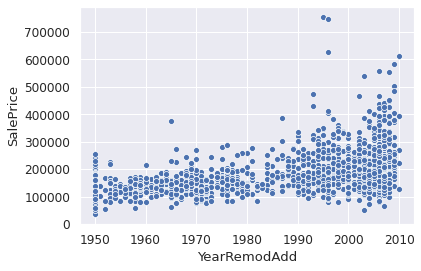

In [ ]:
sns.scatterplot(house_pricing_data.YearRemodAdd, house_pricing_data.SalePrice)
pd.set_option('display.max_rows', None)

house_pricing_data.groupby('YearBuilt').agg({'Id':'size', 'SalePrice':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'})\
                  .round(0).sort_values(by='YearBuilt', ascending=False)

* TotalBsmtSF & SalePrice
* 1stFlrSF & SalePrice
* GrLivArea & SalePrice
* GarageArea & SalePrice

All the 4 attributes show a positive correlation, as the areas increase the price increased too.

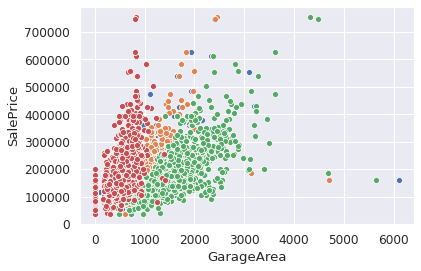

In [ ]:
sns.scatterplot(house_pricing_data.TotalBsmtSF, house_pricing_data.SalePrice)
sns.scatterplot(house_pricing_data['1stFlrSF'], house_pricing_data.SalePrice)
sns.scatterplot(house_pricing_data.GrLivArea, house_pricing_data.SalePrice)
sns.scatterplot(house_pricing_data.GarageArea, house_pricing_data.SalePrice)
plt.legend(labels=['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea'])

##### **Correlation between categorical variables and target variable**

Based on data exploration below, it worth notice that OverallQual, TotRmsAbvGrd, Neighborhood have correlation with target variable. 

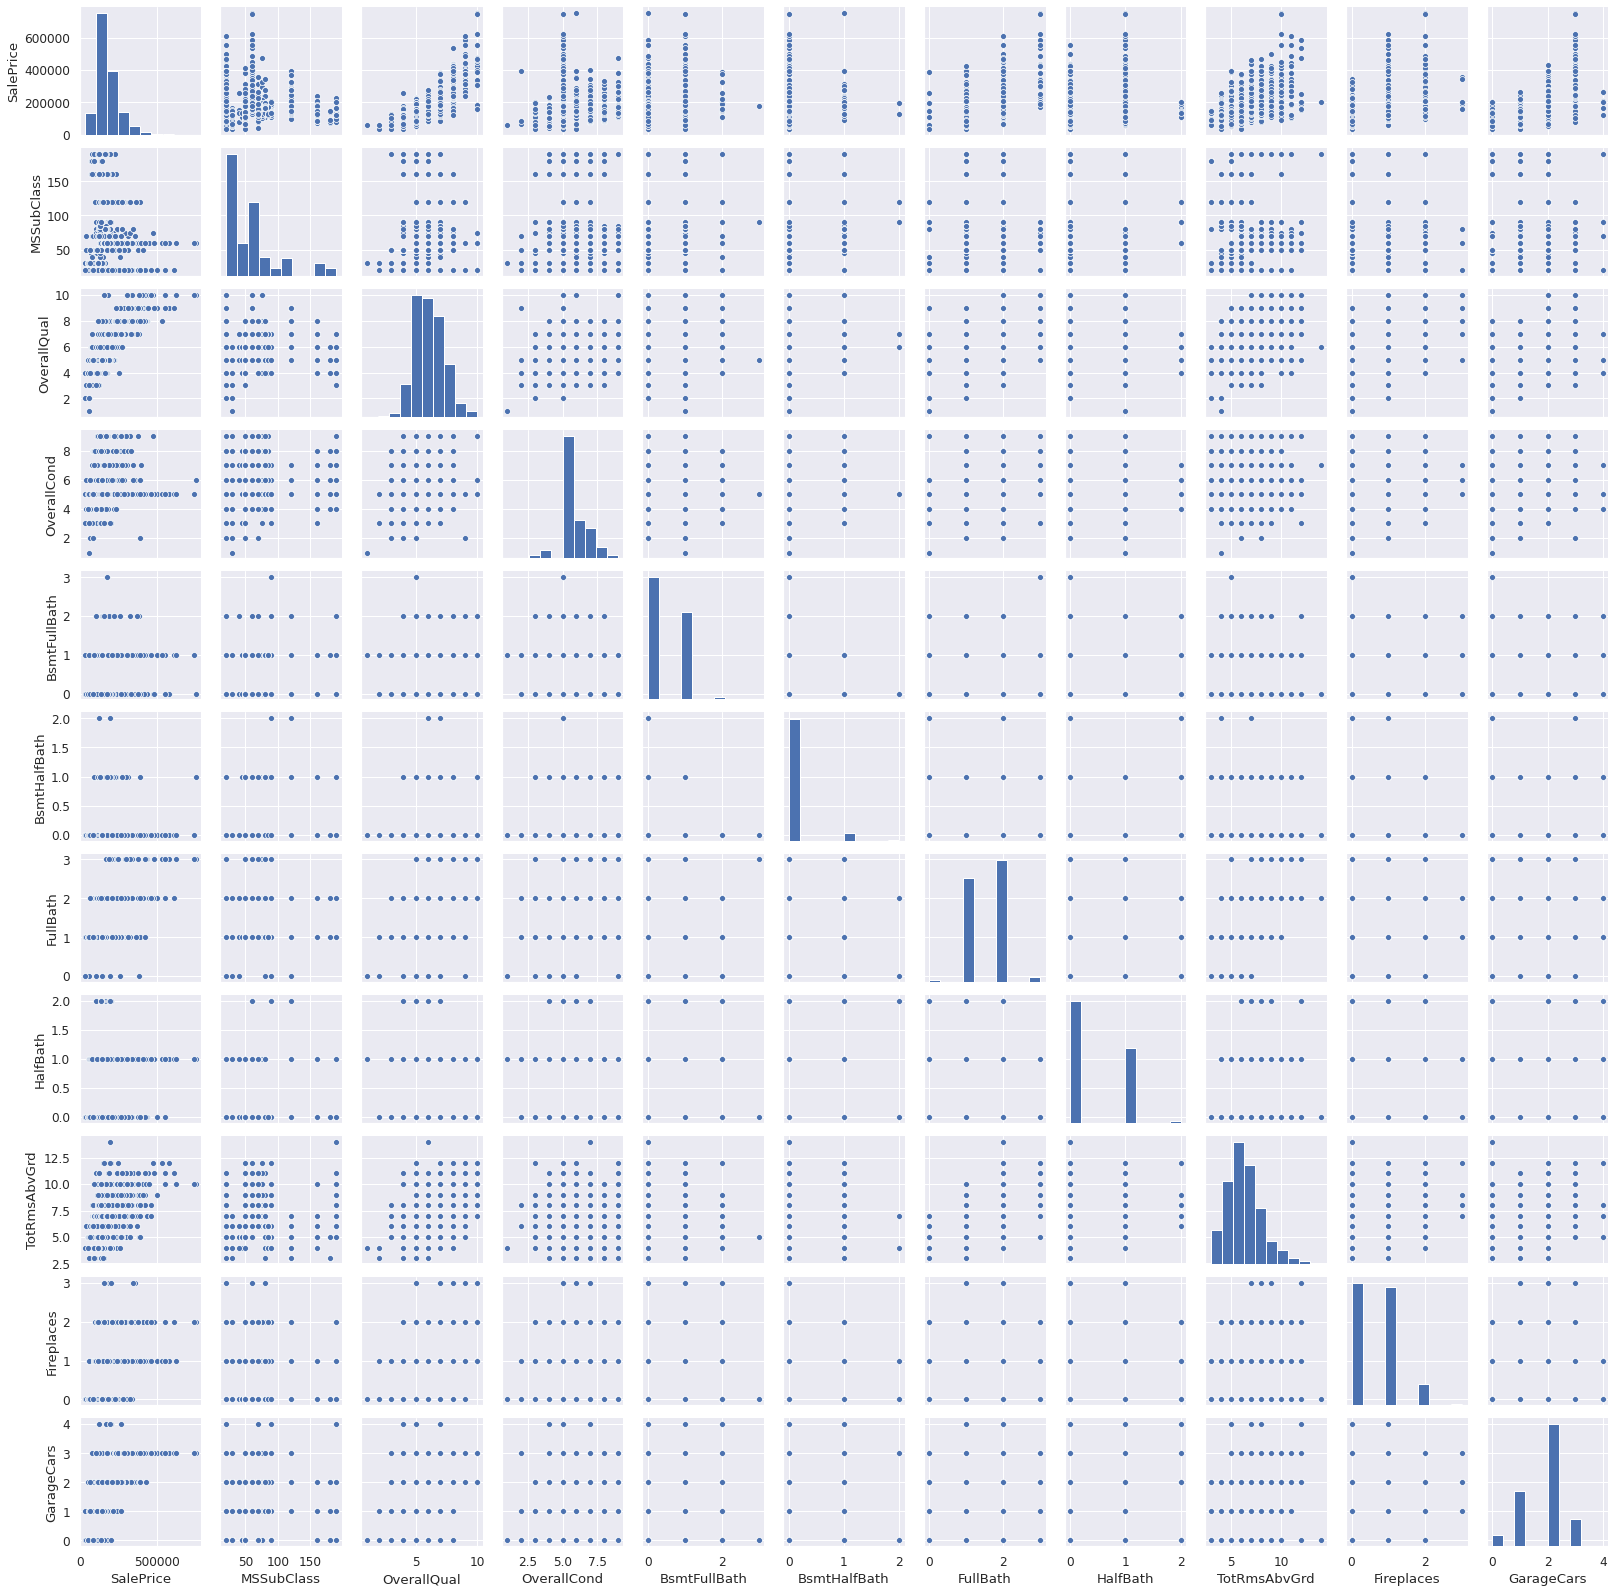

In [ ]:
cat_df = house_pricing_data[['SalePrice','MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
                        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                        'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
                        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
                        'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']].copy()
cat_df
sns.pairplot(cat_df, height = 2)

* SalePrice & MSSubClass - Certain categories of dwellings appear to have higher sales price. Cannot ignore/drop the variable until validating significance furthermore

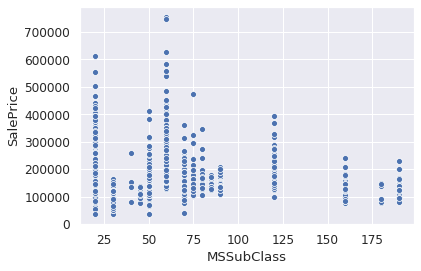

In [ ]:
# Sirisha
sns.scatterplot(cat_df.MSSubClass,cat_df.SalePrice)

* MSZoning & SalePrice - Data has no association

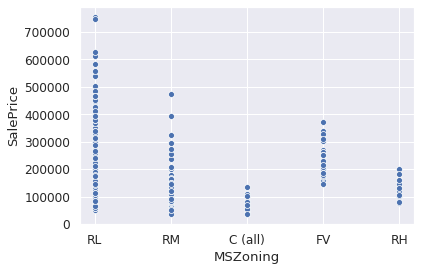

In [ ]:
sns.scatterplot(cat_df.MSZoning,cat_df.SalePrice)

* Street & SalePrice - Although dwellings with gravel access have lesser maximum sale price, there are only 6 observations with 'Gravel street)

Street  SalePrice
0   Grvl          6
1   Pave       1415

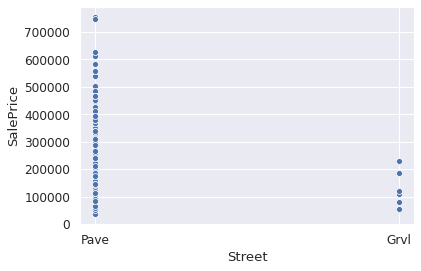

In [ ]:
# Sirisha
sns.scatterplot(cat_df.Street,cat_df.SalePrice)
house_pricing_data.loc[house_pricing_data['Street']=="Grvl"]
house_pricing_data[['SalePrice', 'Street']].groupby(['Street'], as_index=False).count().sort_values(by='SalePrice', ascending=True)

In [ ]:
# Sirisha - Checking the 6 Gravel Street records
house_pricing_data.loc[house_pricing_data['Street']=="Grvl"]

Id  MSSubClass  ... YearBuilt_Group  GarageYrBlt_Group
52      53          90  ...            1950               1950
335    336         190  ...            1950               1950
582    583          90  ...            1975               1975
812    813          20  ...            1950               1950
1061  1062          30  ...            1925               1975
1184  1185          20  ...            1950               1950

[6 rows x 88 columns]

* LotShape & SalePrice - Data has no association.

LotShape  SalePrice
2      IR3         10
1      IR2         40
0      IR1        478
3      Reg        893

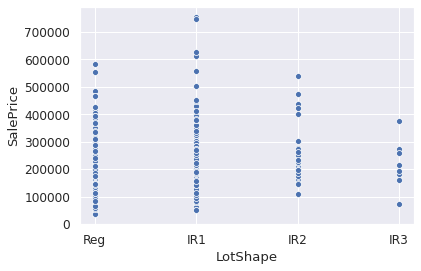

In [ ]:
sns.scatterplot(cat_df.LotShape, cat_df.SalePrice)
house_pricing_data[['SalePrice', 'LotShape']].groupby(['LotShape'], as_index=False).count().sort_values(by='SalePrice', ascending=True)

* LandContour & SalePrice - Data has no association.

LandContour  SalePrice
2         Low         34
1         HLS         50
0         Bnk         61
3         Lvl       1276

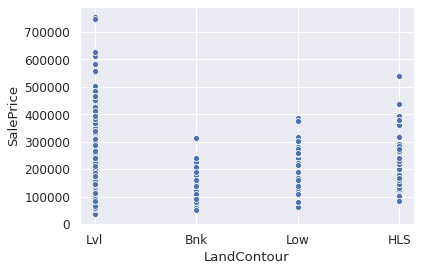

In [ ]:
sns.scatterplot(cat_df.LandContour, cat_df.SalePrice)
house_pricing_data[['SalePrice', 'LandContour']].groupby(['LandContour'], as_index=False).count().sort_values(by='SalePrice', ascending=True)

* Utilities & SalePrice - Data has no association.

Utilities  SalePrice
1    NoSeWa          1
0    AllPub       1420

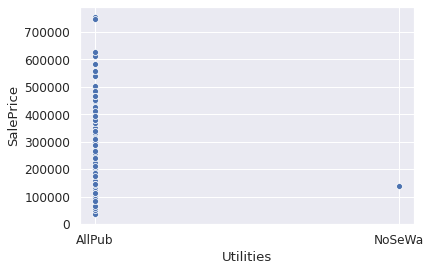

In [ ]:
sns.scatterplot(cat_df.Utilities, cat_df.SalePrice)
# Sirisha - Good candidate to drop. All but 1 variable has All public utilities - Doesn't add much value to our analysis
house_pricing_data[['SalePrice', 'Utilities']].groupby(['Utilities'], as_index=False).count().sort_values(by='SalePrice', ascending=True)

* LotConfig & SalePrice - Has no association.

Count  Mean_SalePrice
LotConfig                       
Corner       257   183109.186770
CulDSac       92   226290.586957
FR2           46   179589.673913
FR3            4   208475.000000
Inside      1022   178851.730920

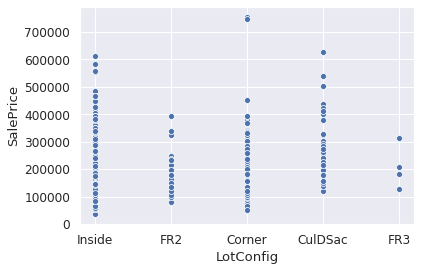

In [ ]:
sns.scatterplot(cat_df.LotConfig, cat_df.SalePrice)
# Sirisha
house_pricing_data.groupby('LotConfig').agg({'Id':'size', 'SalePrice':'mean'}).rename(columns={'Id':'Count','SalePrice':'Mean_SalePrice'})

* LandSlope & SalePrice - At first it may seem that the data has no association. However, a clear trend to see is that the gentler the slope, the higher the selling price. The average price might seem misleading because of the varying size of the samples .

count  mean_price
LandSlope                   
Gtl         1344    181811.0
Mod           64    199194.0
Sev           13    204379.0

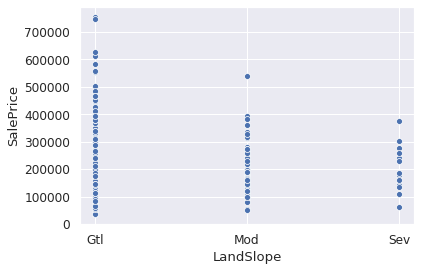

In [ ]:
# Sirisha
sns.scatterplot(cat_df.LandSlope, cat_df.SalePrice)
house_pricing_data.groupby('LandSlope').agg({'Id':'size', 'SalePrice':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0)

* Neighborhood & SalePrice - Some neighborhoods are more expensive than others.

count  mean_price
Neighborhood                   
NoRidge          41    335295.0
NridgHt          76    316695.0
StoneBr          25    310499.0
Timber           38    242247.0
Veenker          11    238773.0
Somerst          86    225380.0
ClearCr          27    215459.0
Crawfor          51    210625.0
CollgCr         149    198002.0
Blmngtn          17    194871.0
Gilbert          78    193160.0
SawyerW          55    190582.0
NWAmes           73    189050.0
Mitchel          47    157792.0
NAmes           215    147992.0
NPkVill           9    142694.0
SWISU            25    142591.0
Sawyer           72    137787.0
Blueste           2    137500.0
Edwards          89    130696.0
OldTown         111    128705.0
BrkSide          55    128147.0
BrDale           16    104494.0
IDOTRR           36    101377.0
MeadowV          17     98576.0

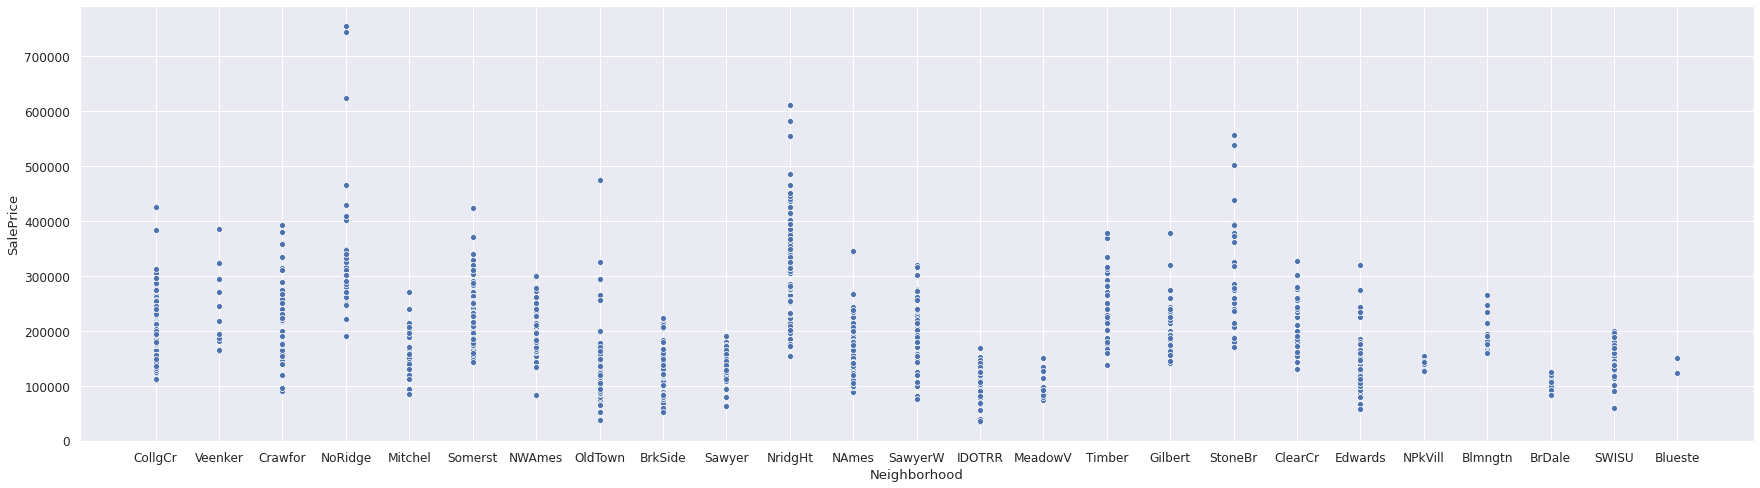

In [ ]:
plt.figure(figsize=(30, 8))
sns.scatterplot(cat_df.Neighborhood, cat_df.SalePrice)
# Sirisha - Understand what are the affluent neighbourhoods within the Ames City limits. We can use bins to categorize neighbourhood by Average price and convert to nominal variable
house_pricing_data.groupby('Neighborhood').agg({'Id':'size', 'SalePrice':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

* Condition1 & SalePrice - Data has no association
* Understanding mean pricing of houses based on proximity to transport/other amenities. Keeping other factors in perspective, proximity to transport tends to increase the sale price. 
* Interesting insight here is that adjacency to East West Railroad has the second least average sale price.

count  mean_price  LotArea
Condition1                            
PosA            8    225875.0  16612.0
PosN           19    215184.0  12733.0
RRNn            5    212400.0   9047.0
RRNe            2    190750.0   9372.0
Norm         1229    186397.0  10446.0
RRAn           26    184397.0  11982.0
Feedr          75    143595.0  10752.0
RRAe           10    141040.0  11992.0
Artery         47    135413.0  10021.0

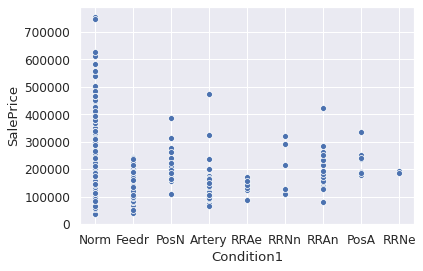

In [ ]:
# Sirisha 
sns.scatterplot(cat_df.Condition1, cat_df.SalePrice)
house_pricing_data.groupby('Condition1').agg({'Id':'size', 'SalePrice':'mean', 'LotArea':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

* Condition2 & SalePrice - Data has no association

count  mean_price  LotArea
Condition2                            
PosA            1    325000.0  13500.0
PosN            2    284875.0  27448.0
RRAe            1    190000.0  18890.0
Norm         1406    183075.0  10528.0
RRAn            1    136905.0  11500.0
Feedr           6    121167.0   8813.0
Artery          2    106500.0   9018.0
RRNn            2     96750.0   7280.0

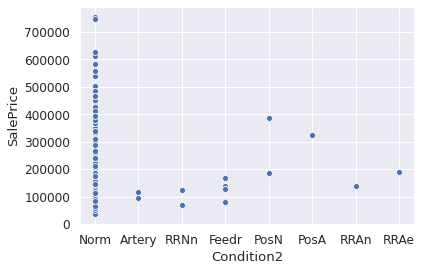

In [ ]:
sns.scatterplot(cat_df.Condition2, cat_df.SalePrice)
# Sirisha - Condition1 and Condition 2 are good candidates to convert to nominal features and enginner an attribute that is a sum of both these factors. 
house_pricing_data.groupby('Condition2').agg({'Id':'size', 'SalePrice':'mean', 'LotArea':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

* BldgType & SalePrice - Has no association.
* As Expected, Single Family Detached homes appear to have higher sale prices compared to other models. Similarly, Townhouse End units are pricier compared to the Inside units. 

count  mean_price  LotArea
BldgType                            
1Fam       1197    187058.0  11261.0
TwnhsE      114    181959.0   4767.0
Duplex       38    143254.0  10200.0
Twnhs        43    135912.0   2391.0
2fmCon       29    131729.0  16308.0

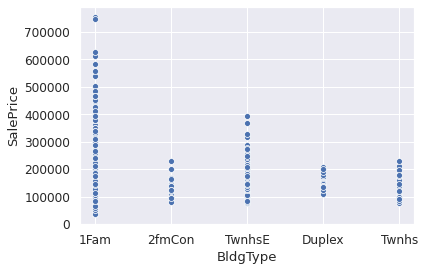

In [ ]:
# Sirisha 
sns.scatterplot(cat_df.BldgType, cat_df.SalePrice)
house_pricing_data.groupby('BldgType').agg({'Id':'size', 'SalePrice':'mean', 'LotArea':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

* HouseStyle & SalePrice - Has no association.

count  mean_price  LotArea
HouseStyle                            
2.5Fin          8    220000.0  12468.0
2Story        440    210926.0  10324.0
1Story        698    178789.0  10701.0
SLvl           65    166703.0  10538.0
2.5Unf         11    157355.0   9153.0
1.5Fin        149    144222.0  11492.0
SFoyer         36    133313.0   7683.0
1.5Unf         14    110150.0   7119.0

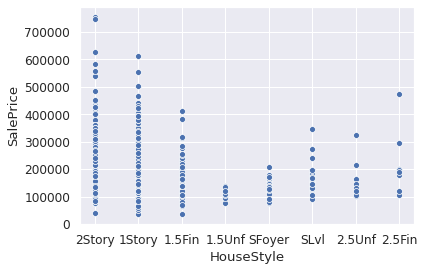

In [ ]:
sns.scatterplot(cat_df.HouseStyle, cat_df.SalePrice)
# Sirisha - Distribution of mean price and Lot Area
house_pricing_data.groupby('HouseStyle').agg({'Id':'size', 'SalePrice':'mean', 'LotArea':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

* RoofStyle & SalePrice - Gable and Hip are the most common rooftypes and Hips are pricier. 

count  mean_price  LotArea
RoofStyle                            
Shed           2    225000.0  21242.0
Hip          278    222262.0  12340.0
Flat          12    204081.0  23563.0
Mansard        7    180568.0  11089.0
Gable       1111    172970.0   9945.0
Gambrel       11    148909.0   9434.0

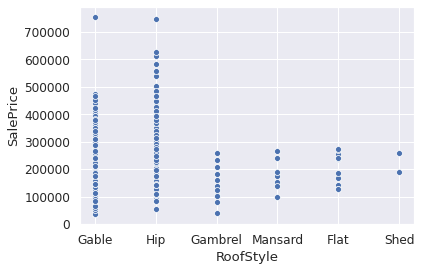

In [ ]:
#  Sirisha
sns.scatterplot(cat_df.RoofStyle, cat_df.SalePrice)
house_pricing_data.groupby('RoofStyle').agg({'Id':'size', 'SalePrice':'mean', 'LotArea':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

* RoofMatl & SalePrice - Data has no association

count  mean_price  LotArea
RoofMatl                            
WdShngl       6    390250.0  30690.0
Membran       1    241500.0  39104.0
WdShake       5    241400.0  15798.0
Tar&Grv      10    195747.0  21785.0
CompShg    1396    181615.0  10293.0
Metal         1    180000.0  21453.0
ClyTile       1    160000.0  63887.0
Roll          1    137000.0  11345.0

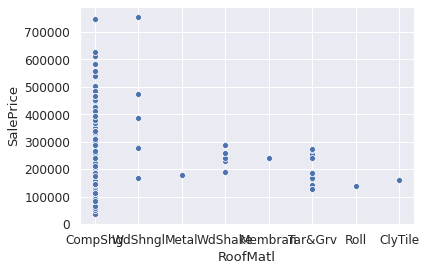

In [ ]:
#  Sirisha
sns.scatterplot(cat_df.RoofMatl, cat_df.SalePrice) 
house_pricing_data.groupby('RoofMatl').agg({'Id':'size', 'SalePrice':'mean', 'LotArea':'mean'}).rename(columns={'Id':'count','SalePrice':'mean_price'}).round(0).sort_values(by='mean_price', ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

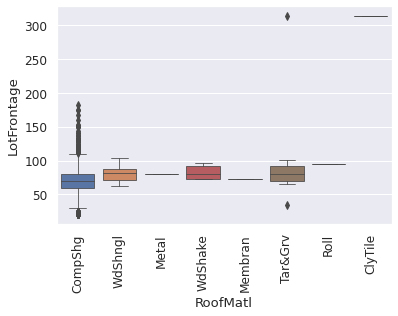

In [ ]:
sns.boxplot(x=house_pricing_data['RoofMatl'], y=house_pricing_data['LotFrontage'], linewidth=0.8)
# plt.setp(label ,rotation=45, fontsize=8)
plt.xticks(rotation = 90)

* Exterior1st & SalePrice - SalePrice varies among different types of exterior covering 

Exterior1st
AsbShng    110289.500000
BrkComm     60000.000000
BrkFace    204427.777778
CBlock     105000.000000
CemntBd    231690.655738
HdBoard    163618.944954
ImStucc    262000.000000
MetalSd    150636.879070
Plywood    177679.281553
Stone      258500.000000
Stucco     169293.478261
VinylSd    215190.619329
Wd Sdng    150796.430693
WdShing    153525.000000
Name: SalePrice, dtype: float64

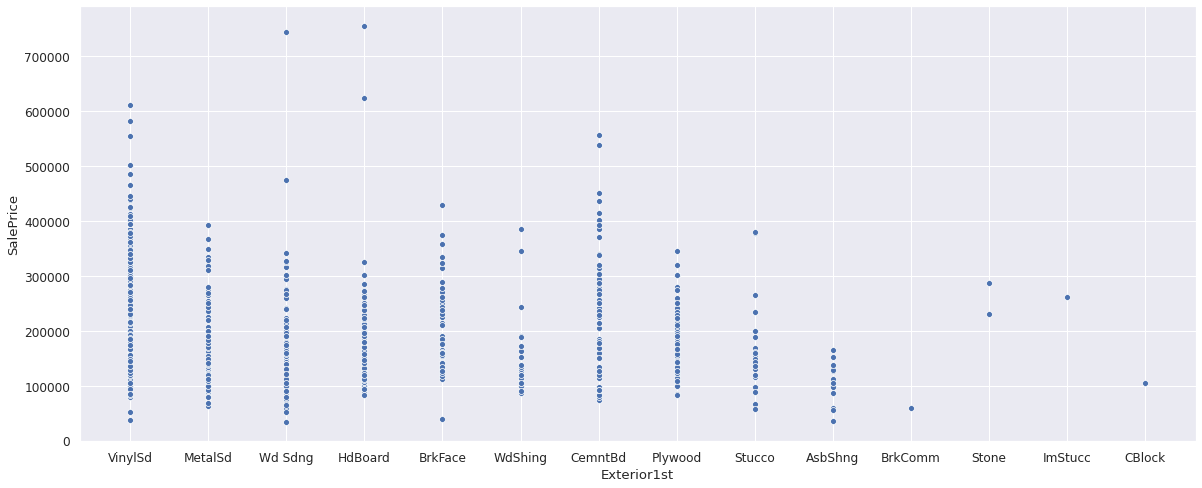

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(cat_df.Exterior1st, cat_df.SalePrice)
cat_df.groupby(['Exterior1st'])['SalePrice'].mean() 

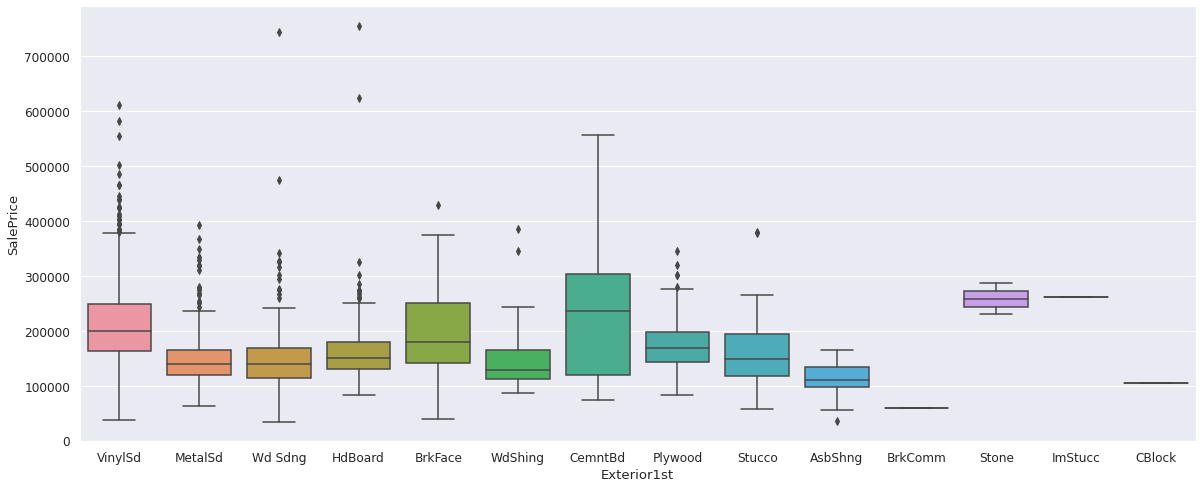

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x=cat_df['Exterior1st'], y=cat_df['SalePrice'])

* Exterior2nd & SalePrice - SalePrice varies among different types of exterior covering

Exterior2nd
AsbShng    115826.894737
AsphShn    157000.000000
Brk Cmn    134166.666667
BrkFace    204589.130435
CBlock     105000.000000
CmentBd    230093.833333
HdBoard    168333.399015
ImStucc    252070.000000
MetalSd    151061.861244
Other      319000.000000
Plywood    170034.933333
Stone      202541.333333
Stucco     158641.360000
VinylSd    215609.979879
Wd Sdng    149612.853403
Wd Shng    166041.666667
Name: SalePrice, dtype: float64

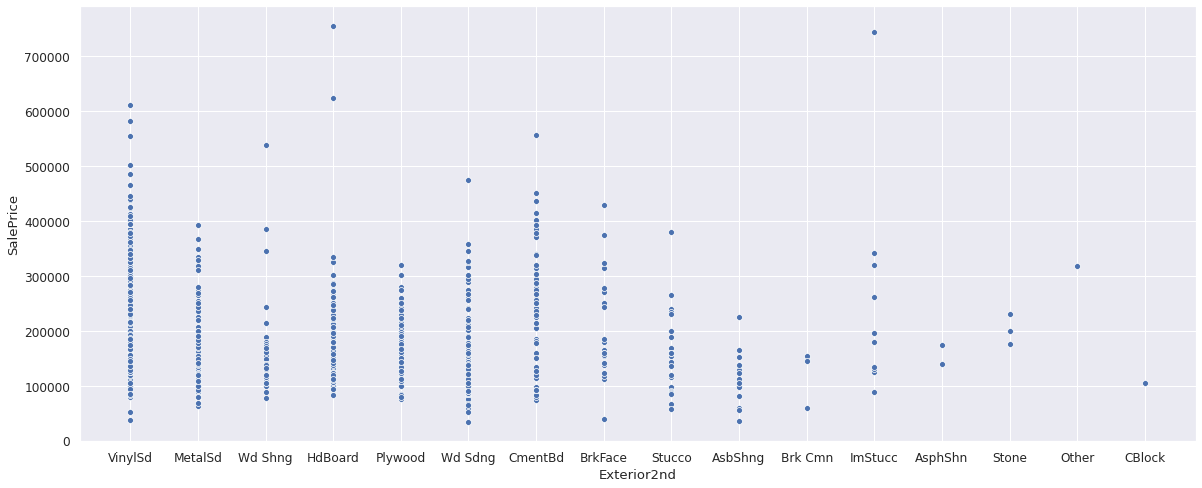

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(cat_df.Exterior2nd, cat_df.SalePrice)
cat_df.groupby(['Exterior2nd'])['SalePrice'].mean() 

* MasVnrType & SalePrice - Data has no association

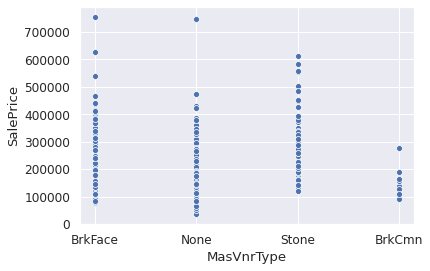

In [ ]:
sns.scatterplot(cat_df.MasVnrType, cat_df.SalePrice)

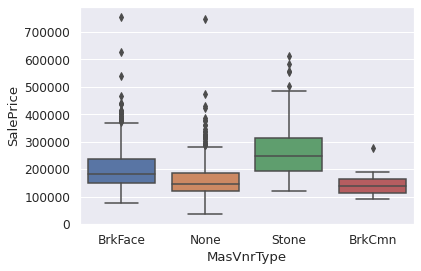

In [ ]:
sns.boxplot(x=cat_df['MasVnrType'], y=cat_df['SalePrice'])

* ExterQual & SalePrice - SalePrice varies among different types of exterior quality , better quality, higher price

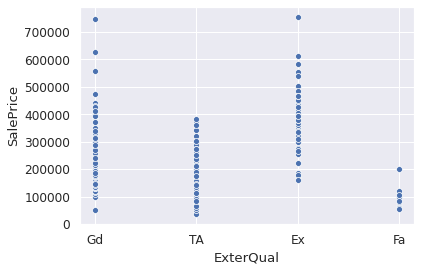

In [ ]:
sns.scatterplot(cat_df.ExterQual, cat_df.SalePrice)

* ExterCond & SalePrice - Data has no association

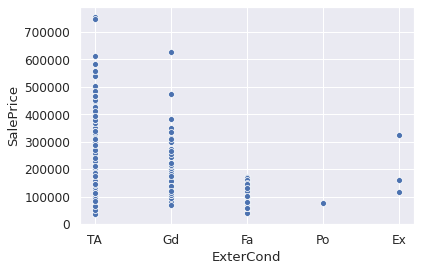

In [ ]:
sns.scatterplot(cat_df.ExterCond, cat_df.SalePrice)

* Foundation & SalePrice - Data has no association

Foundation
BrkTil    132470.668966
CBlock    150479.505600
PConc     225776.629283
Stone     165959.166667
Wood      185666.666667
Name: SalePrice, dtype: float64

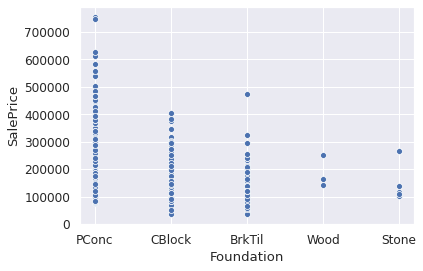

In [ ]:
sns.scatterplot(cat_df.Foundation, cat_df.SalePrice)
cat_df.groupby(['Foundation'])['SalePrice'].mean() 

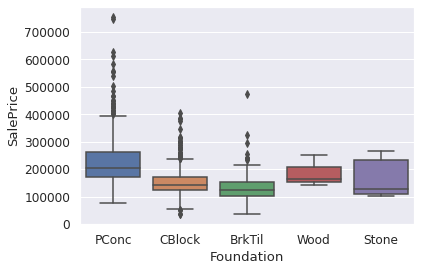

In [ ]:
sns.boxplot(x=cat_df['Foundation'], y=cat_df['SalePrice'])

* BsmtQual & SalePrice - SalePrice varies among different basement height, better height, more price.

BsmtQual
Ex    327041.041322
Fa    115692.028571
Gd    202573.019481
TA    140759.818182
Name: SalePrice, dtype: float64

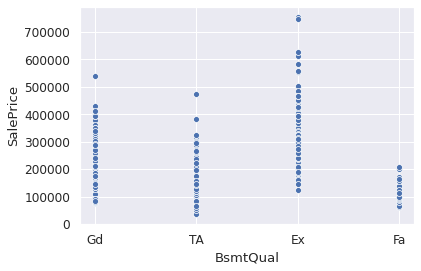

In [ ]:
sns.scatterplot(cat_df.BsmtQual, cat_df.SalePrice)
cat_df.groupby(['BsmtQual'])['SalePrice'].mean() 

* BsmtCond & SalePrice - SalePrice varies among different basement condition, better condition, higher price.

BsmtCond
Fa    121809.533333
Gd    213599.907692
Po     64000.000000
TA    183549.171887
Name: SalePrice, dtype: float64

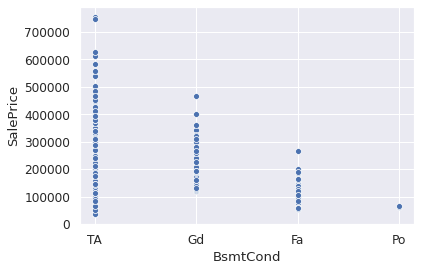

In [ ]:
sns.scatterplot(cat_df.BsmtCond, cat_df.SalePrice)
cat_df.groupby(['BsmtCond'])['SalePrice'].mean() 

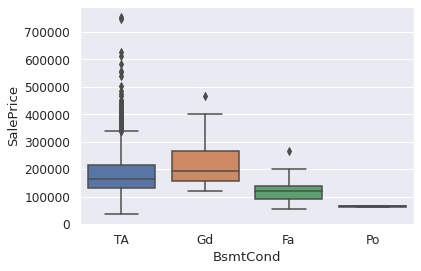

In [ ]:
sns.boxplot(x=cat_df['BsmtCond'], y=cat_df['SalePrice'])

* BsmtExposure & SalePrice - Data have no significant correlation.

BsmtExposure
Av    206643.420814
Gd    257689.805970
Mn    192789.657895
No    165527.981092
Name: SalePrice, dtype: float64

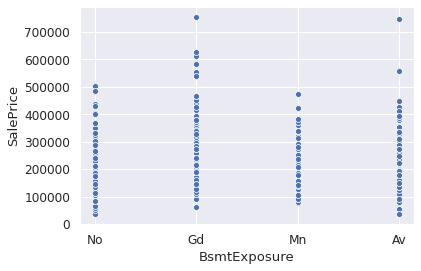

In [ ]:
sns.scatterplot(cat_df.BsmtExposure, cat_df.SalePrice)
cat_df.groupby(['BsmtExposure'])['SalePrice'].mean() 

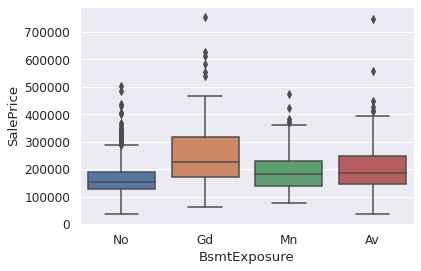

In [ ]:
sns.boxplot(x=cat_df['BsmtExposure'], y=cat_df['SalePrice'])

* BsmtFinType1 & SalePrice - Data has no association

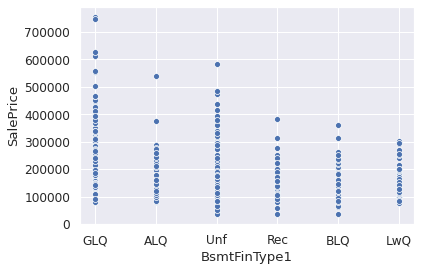

In [ ]:
sns.scatterplot(cat_df.BsmtFinType1, cat_df.SalePrice)

* BsmtFinType2 & SalePrice - Data has no association

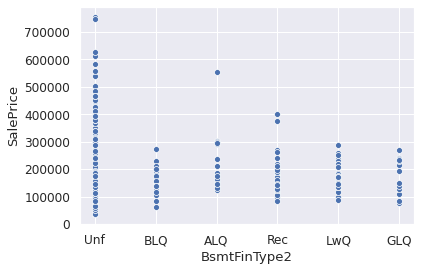

In [ ]:
sns.scatterplot(cat_df.BsmtFinType2, cat_df.SalePrice)

* Heating & SalePrice - Data has no significante association.

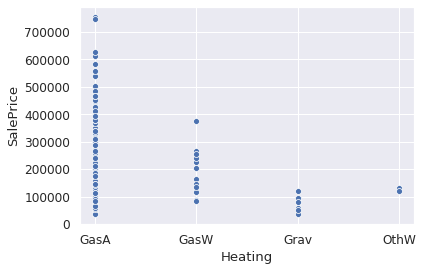

In [ ]:
sns.scatterplot(cat_df.Heating, cat_df.SalePrice)

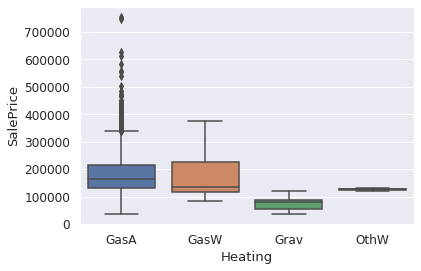

In [ ]:
sns.boxplot(x=cat_df['Heating'], y=cat_df['SalePrice'])

* HeatingQC & SalePrice - Data has no association

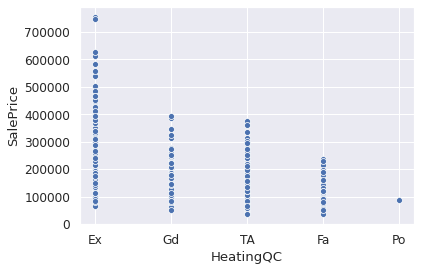

In [ ]:
sns.scatterplot(cat_df.HeatingQC, cat_df.SalePrice)

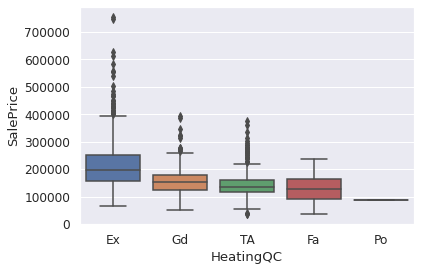

In [ ]:
sns.boxplot(x=cat_df['HeatingQC'], y=cat_df['SalePrice'])

* CentralAir & SalePrice - Data has no association

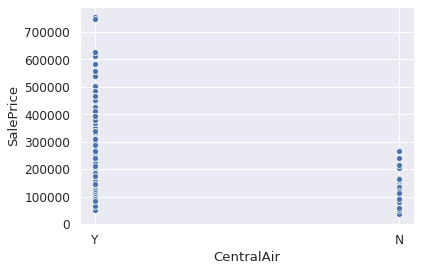

In [ ]:
sns.scatterplot(cat_df.CentralAir, cat_df.SalePrice)

* Electrical & SalePrice - Data have No association

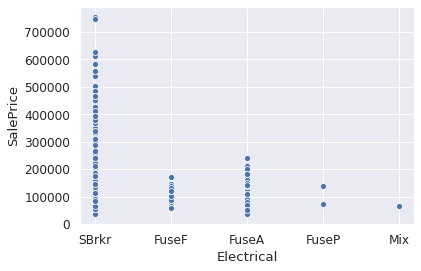

In [ ]:
sns.scatterplot(cat_df.Electrical, cat_df.SalePrice)

* KitchenQual & SalePrice - Better quality, higher price.

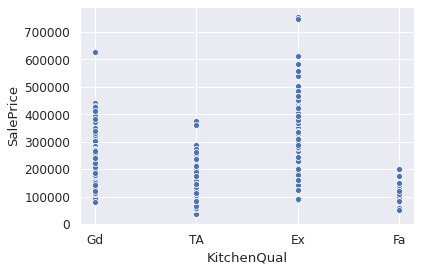

In [ ]:
sns.scatterplot(cat_df.KitchenQual, cat_df.SalePrice)

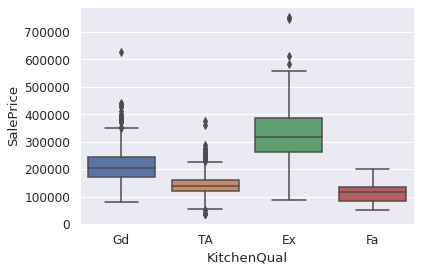

In [ ]:
sns.boxplot(x=cat_df['KitchenQual'], y=cat_df['SalePrice'])

* Functional & SalePrice - Data has no association

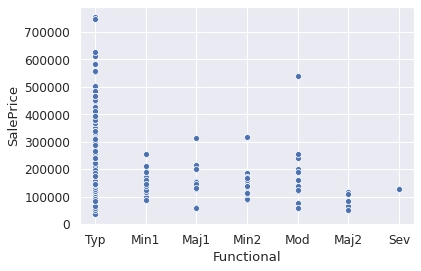

In [ ]:
sns.scatterplot(cat_df.Functional, cat_df.SalePrice)

* GarageType & SalePrice - Price varies among different types of garage

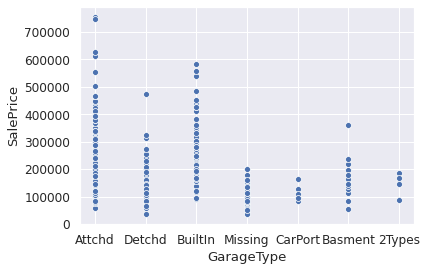

In [ ]:
sns.scatterplot(cat_df.GarageType, cat_df.SalePrice)

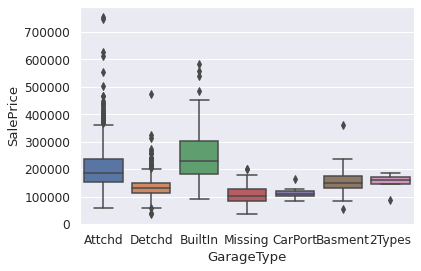

In [ ]:
sns.boxplot(x=cat_df['GarageType'], y=cat_df['SalePrice'])

* GarageFinish & SalePrice - Data has no association

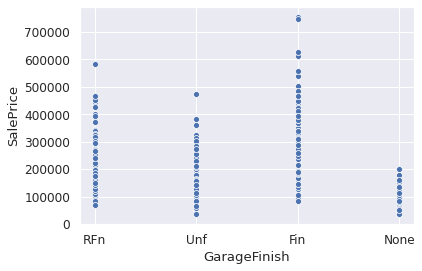

In [ ]:
sns.scatterplot(cat_df.GarageFinish, cat_df.SalePrice)

* GarageCars & SalePrice - Bigger garage, higher price

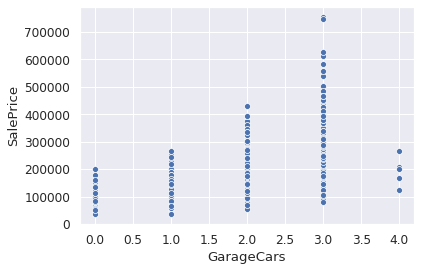

In [ ]:
 sns.scatterplot(cat_df.GarageCars, cat_df.SalePrice)

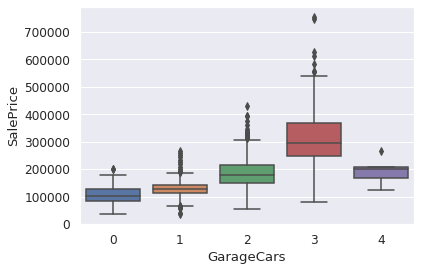

In [ ]:
sns.boxplot(x=cat_df['GarageCars'], y=cat_df['SalePrice'])

* GarageQual & SalePrice - Data has no association

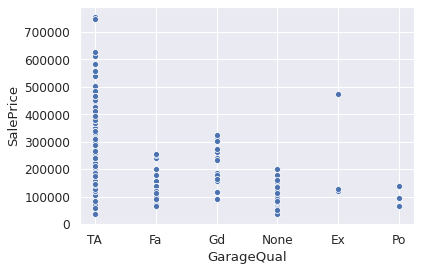

In [ ]:
sns.scatterplot(cat_df.GarageQual, cat_df.SalePrice)

* GarageCond & SalePrice - Data has no association

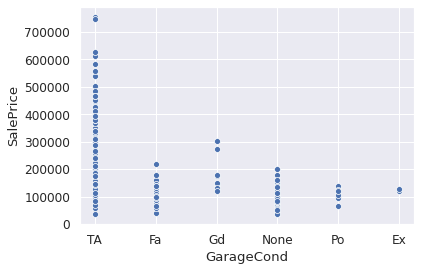

In [ ]:
sns.scatterplot(cat_df.GarageCond, cat_df.SalePrice)

* PavedDrive & SalePrice - Data has no association

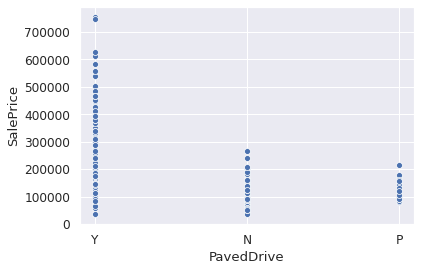

In [ ]:
#Correlation between categorical variables and target variable - 
sns.scatterplot(cat_df.PavedDrive, cat_df.SalePrice)

* SaleType & SalePrice - Data has no association

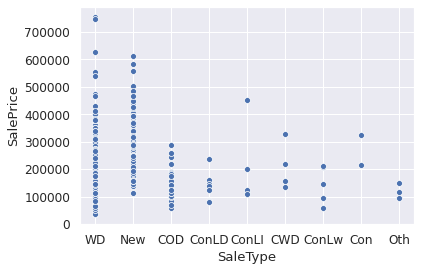

In [ ]:
sns.scatterplot(cat_df.SaleType, cat_df.SalePrice)

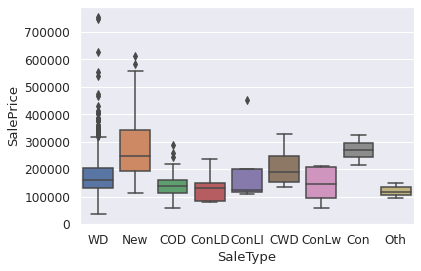

In [ ]:
sns.boxplot(x=cat_df['SaleType'], y=cat_df['SalePrice'])


* SaleCondition & SalePrice - Data has no association

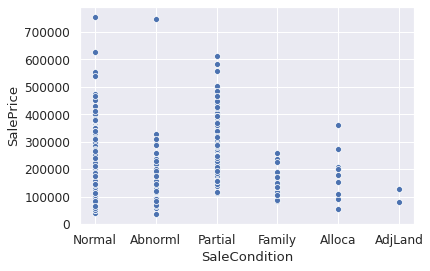

In [ ]:
sns.scatterplot(cat_df.SaleCondition, cat_df.SalePrice)

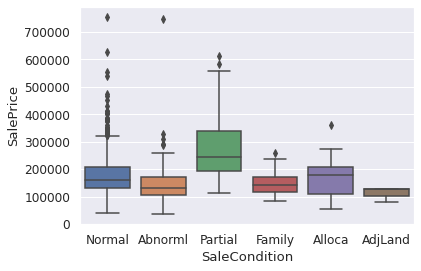

In [ ]:
sns.boxplot(x=cat_df['SaleCondition'], y=cat_df['SalePrice'])

## Data Exploration - Multivariate Analysis

Base on the analysis in the previous section, numberical variables (YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea) and categorical variables (OverallQual, TotRmsAbvGrd, Neighborhood, Exterior1st, Exterior2st, ExterQual, BsmtQual, KitchenQual, GarageType, GarageCars) have correlation with SalePrice. 


In this section, we will explore more about how these variables impact SalePrice.

Variables can be segmented into below 4 dimensions:
  * Dimension 1: House overall condition: YearBuilt, OverallQual, YearRemodAdd
  * Dimension 2: House inside condition: GrLivArea, TotalBsmtSF, 1stFlrSF, TotRmsAbvGrd, BsmtQual, KitchenQual
  * Dimension 3: House outside condition: GarageArea, Exterior1st, Exterior2st, ExterQual, GarageType, GarageCars
  * Dimension 4: House community environment: Neighborhood, Condition1, Condition2


  **Dimension 1 obersvations** : 
  * Newer house, better overall quality, and higher house price.
  * More recent remodel date, better overall quality, and higher house price.


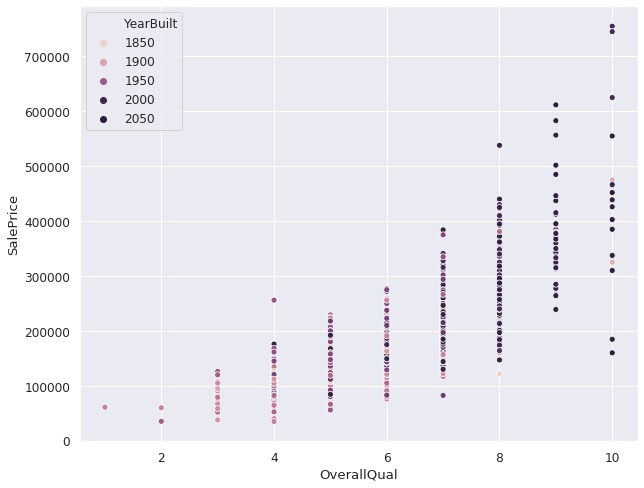

In [ ]:
#Yezhou Jiang
#Dimension 1: House overall condition (YearBuilt and OverallQual) with SalePrice
yrqual = house_pricing_data.groupby(['YearBuilt','OverallQual','SalePrice'])['SalePrice'].mean() 
yrqual
plt.figure(figsize=(10,8))
sns.scatterplot(house_pricing_data.OverallQual,house_pricing_data.SalePrice,house_pricing_data.YearBuilt)
#House over all condition (YearRemodAdd and OverallQual) with SalePrice

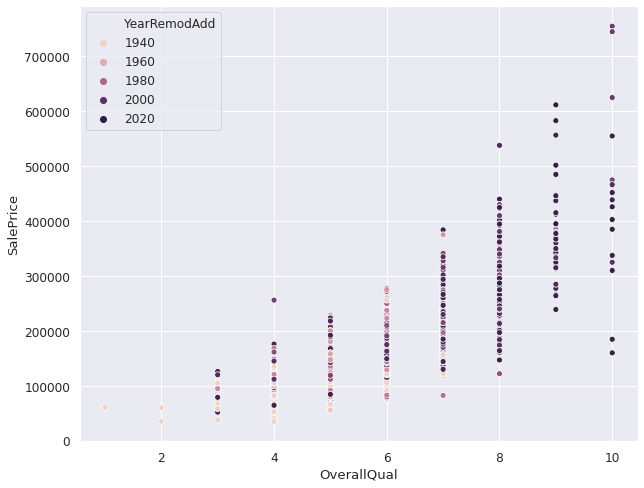

In [ ]:
#Dimension 1: House over all condition (YearRemodAdd and OverallQual) with SalePrice
plt.figure(figsize=(10,8))
sns.scatterplot(house_pricing_data.OverallQual,house_pricing_data.SalePrice,house_pricing_data.YearRemodAdd)


**Dimension 2 observations**:
* Bigger living area, better kitchen condition, higher price
* Bigger basement area, higher basement ceiling, more expensive.

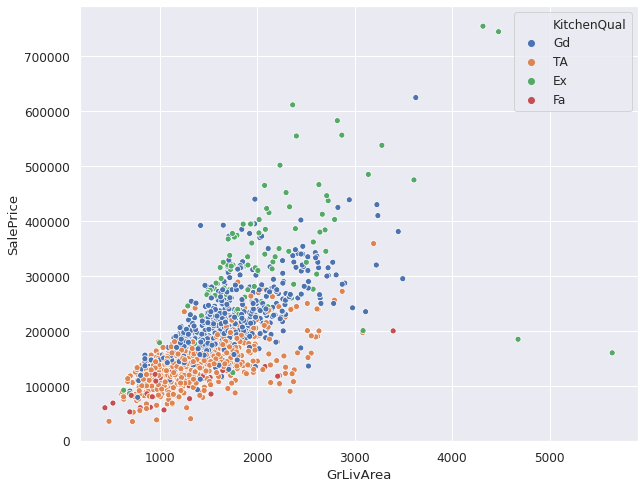

In [ ]:
#Dimension 2: House inside condition (GrLivArea and KitchenQual) with SalePrice - ground floor condition
plt.figure(figsize=(10,8))
sns.scatterplot(house_pricing_data.GrLivArea,house_pricing_data.SalePrice,house_pricing_data.KitchenQual)


**Dimension 3 observations :**
* Attached and built in garages with a larger area seems to have a higer house price.
* Detached garages seem to have lesser home prices though the area may be large.
* Better ExteriorQuality has higher home prices. In particular the better quality vinyl and cement exterior have higher house price.

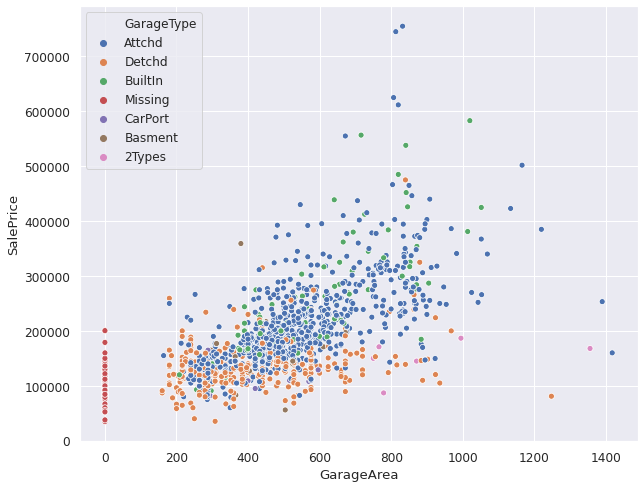

In [ ]:
#Dimension 3: House outside condition (GarageArea and GarageType) with SalePrice - garage condition
plt.figure(figsize=(10,8))
sns.scatterplot(house_pricing_data.GarageArea,house_pricing_data.SalePrice,house_pricing_data.GarageType)

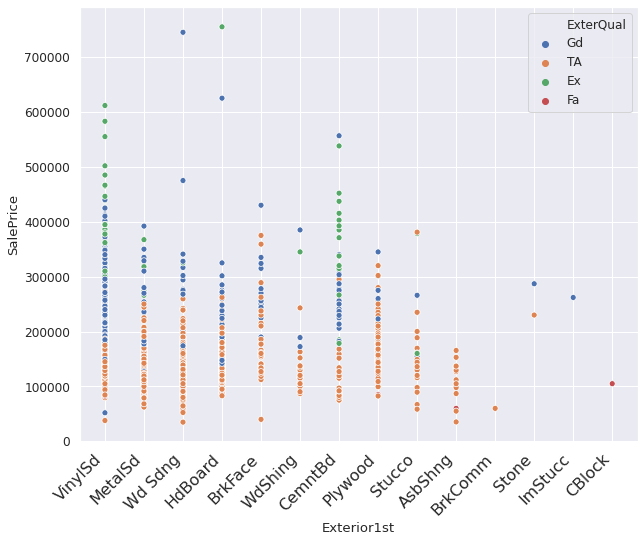

In [ ]:

#Dimension 3: House outside condition (Exterior1st & ExterQual) with SalePrice 
plt.figure(figsize=(10,8))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
sns.scatterplot(house_pricing_data.Exterior1st,house_pricing_data.SalePrice,house_pricing_data.ExterQual)


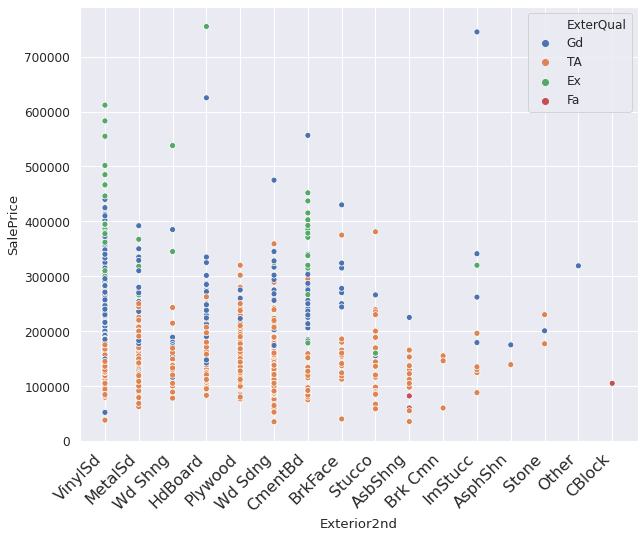

In [ ]:
#Dimension 3: House outside condition (Exterior2nd & ExterQual) with SalePrice 
plt.figure(figsize=(10,8))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
sns.scatterplot(house_pricing_data.Exterior2nd,house_pricing_data.SalePrice,house_pricing_data.ExterQual)

**Dimension 4 observations**: 
* More than the conditions, the neighborhood seems to have an impact on the house pricing. 

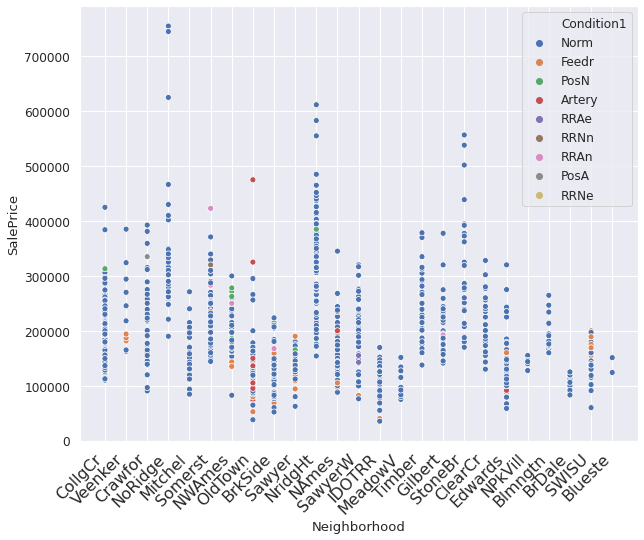

In [ ]:

#Dimension 4: House community environment (Neighborhood, Condition1, Condition2) with SalePrice 
plt.figure(figsize=(10,8))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
sns.scatterplot(house_pricing_data.Neighborhood,house_pricing_data.SalePrice,house_pricing_data.Condition1)


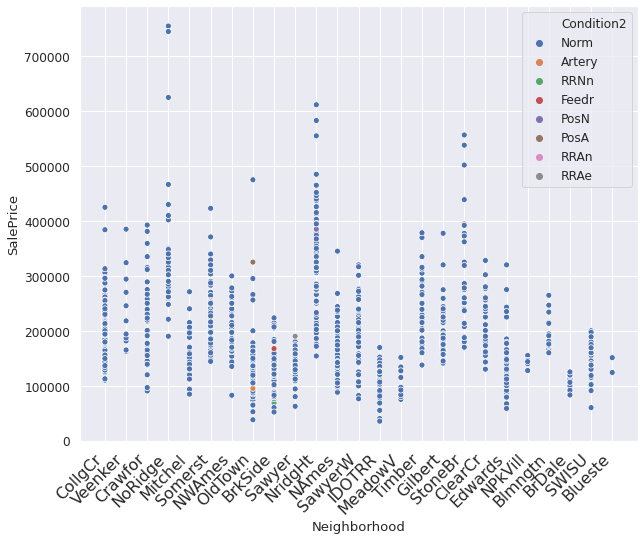

In [ ]:

#Dimension 4: House community environment (Neighborhood, Condition1, Condition2) with SalePrice 
plt.figure(figsize=(10,8))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
sns.scatterplot(house_pricing_data.Neighborhood,house_pricing_data.SalePrice,house_pricing_data.Condition2)
